In [1]:
# Demonstrates cartopy's ability to draw map tiles which are downloaded on
# demand from the MapQuest tile server. Internally these tiles are then combined
# into a single image and displayed in the cartopy GeoAxes.

using PyCall, PyPlot
ccrs = pyimport("cartopy.crs")
cimgt = pyimport("cartopy.io.img_tiles")

# matplotlib = pyimport("matplotlib")
# matplotlib.use("tkagg")
# plt = pyimport("matplotlib.pyplot")
# transforms = pyimport("matplotlib.transforms")

# Target longitude/latitude coordinates (Eyjafjallajökull volcano).
coords = [-19.613333, 63.62]

# Create a MapQuest open aerial instance.
map_quest_aerial = cimgt.MapQuestOpenAerial()

# Create a GeoAxes in the tile's projection and limit its extent to a small lat/lon range.
ax = subplot(projection=map_quest_aerial.crs)
ax.set_extent([-22, -15, 63, 65])

# Add the MapQuest data at zoom level 8.
ax.add_image(map_quest_aerial, 8)

# Add a marker at the target coordinates.
plot(coords[1], coords[2], marker="o", color="yellow", markersize=12, 
     alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = matplotlib.transforms.offset_copy(geodetic_transform, units="dots", x=-25)

# Add text 25 pixels to the left of the target.
text(coords[1], coords[2], "Eyjafjallajökull",
     verticalalignment="center", horizontalalignment="right",
     transform=text_transform,
     bbox=Dict("facecolor"=>"wheat", "alpha"=>0.5, "boxstyle"=>"round"))

savefig("05mapTileAcquisitionExample2.png", dpi=300)

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/jpwspicer/.julia/packages/PyCall/ttONZ/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('A non-empty list of tiles should be provided to merge.')
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 689, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 2094, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2075, in print_figure
    **kwargs)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 510, in print_png
    FigureCanvasAgg.draw(self)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 402, in draw
    self.figure.draw(self.renderer)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 50, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 1649, in draw
    renderer, self, artists, self.suppressComposite)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/image.py", line 138, in _draw_list_compositing_images
    a.draw(renderer)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/matplotlib/artist.py", line 50, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py", line 379, in draw
    self._get_extent_geom(factory.crs), args[0])
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/cartopy/io/img_tiles.py", line 100, in image_for_domain
    img, extent, origin = _merge_tiles(tiles)
  File "/Users/jpwspicer/.julia/conda/3/lib/python3.7/site-packages/cartopy/io/img_tiles.py", line 409, in _merge_tiles
    raise ValueError('A non-empty list of tiles should '


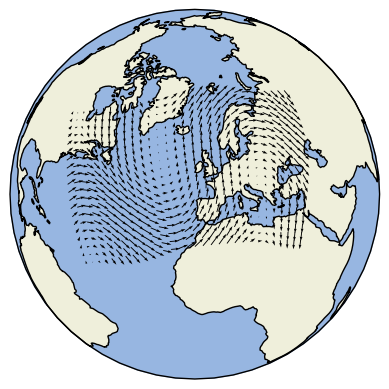

In [27]:
using PyCall, PyPlot

ccrs = pyimport("cartopy.crs")
feature = pyimport("cartopy.feature")

"""
Returns `(x, y, u, v, crs)` of some vector data
computed mathematically. 
"""
function sample_data(shape=(20, 30))
    x = range(311.9, stop=391.1, length=shape[2])
    y = range(-23.6, stop=24.8, length=shape[1])

    x2d, y2d = repeat(x', length(y), 1), repeat(y, 1, length(x))
    u = 10(2cos.(2deg2rad.(x2d) .+ 3deg2rad.(y2d .+ 30)).^2)
    v = 20cos.(6deg2rad.(x2d))

    return x, y, u, v
end

ax = subplot(projection=ccrs.Orthographic(-10, 45))

# The crs will be a rotated pole CRS, meaning that the vectors 
# will be unevenly spaced in regular PlateCarree space.
crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

ax.add_feature(feature.OCEAN, zorder=0)
ax.add_feature(feature.LAND, zorder=0, edgecolor="k")

ax.set_global()
ax.gridlines()

x, y, u, v = sample_data()
ax.quiver(collect(x), collect(y), u, v, transform=crs)